In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
data = pd.read_csv("startup_funding.csv")
d = data.copy()
d

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [70]:
d.dropna(subset=['InvestmentType','AmountInUSD'],inplace=True)

d['InvestmentType'].replace('SeedFunding', 'Seed Funding', inplace = True)
d['InvestmentType'].replace('Crowd funding', 'Crowd Funding', inplace = True)
d['InvestmentType'].replace('PrivateEquity', 'Private Equity', inplace = True)
d['InvestmentType'].value_counts()

Private Equity    828
Seed Funding      694
Crowd Funding       2
Debt Funding        1
Name: InvestmentType, dtype: int64

In [71]:
def amount_generator(amt):
    amt = amt.split(',')
    ans=""
    for i in range(len(amt)):
        ans = ans+amt[i].strip()
    return int(ans)
d['AmountInUSD']=d['AmountInUSD'].apply(amount_generator)

private_equity = sum(d.AmountInUSD[d.InvestmentType=='Private Equity'])
seed_funding = sum(d.AmountInUSD[d.InvestmentType=='Seed Funding'])
crowd_funding =  sum(d.AmountInUSD[d.InvestmentType=='Crowd Funding'])
debt_funding =  sum(d.AmountInUSD[d.InvestmentType=='Debt Funding'])

In [75]:
total = private_equity + seed_funding + crowd_funding + debt_funding
pe = round((private_equity*100/total),2)
sf = round((seed_funding*100/total),2)
cf = round((crowd_funding*100/total),2)
df = round((debt_funding*100/total),2)

fund_type = ["Private Equity", "Seed Funding", "Crowd Funding", "Debt Funding"]
fund_per = [pe, sf, cf, df]

t_d = zip(fund_type, fund_per)
t = pd.DataFrame(t_d, columns = ['Investment Type', 'Percentage'])
t

,Investment Type,Percentage
0,Private Equity,98.15
1,Seed Funding,1.81
2,Crowd Funding,0.00
3,Debt Funding,0.04


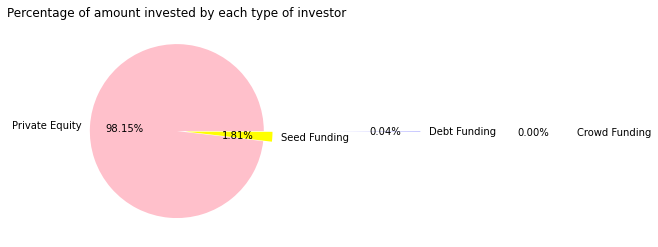

In [105]:
colors = ["pink","yellow", "red", "blue"]
explode = [0, 0.1, 3.5, 1.8]
plt.pie(fund_per, labels = fund_type, explode = explode, autopct = "%.2f%%", colors = colors)
plt.title("Percentage of amount invested by each type of investor")
plt.show()